<a href="https://colab.research.google.com/github/Gen-Loper/Hand_Written_Digit_Recognition/blob/main/Hand_Written_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

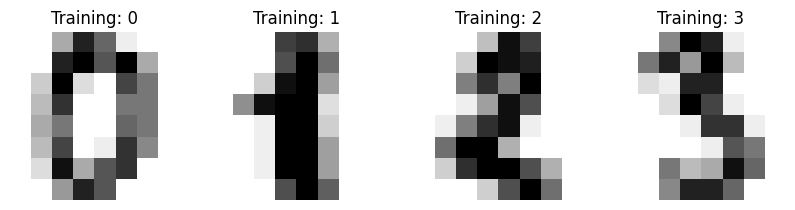

In [2]:
from sklearn.datasets import load_digits
df = load_digits()
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,lebel in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  ax.set_title('Training: %i' % lebel)


**Data Preprocessing**

In [3]:
df.images.shape

(1797, 8, 8)

In [4]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
df.images[0].shape

(8, 8)

In [6]:
len(df.images)

1797

In [7]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [8]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
data[0].shape

(64,)

In [10]:
data.shape

(1797, 64)

In [11]:
data.min()

0.0

In [12]:
data.max()

16.0

In [13]:
data = data //6

In [14]:
data.min()

0.0

In [15]:
data.max()

2.0

In [16]:
data[0]

array([0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 2., 2., 1., 2., 0., 0., 0.,
       0., 2., 0., 0., 1., 1., 0., 0., 0., 2., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 2., 1., 0., 0., 0., 2.,
       0., 1., 2., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0.])

**Train Test Split Data**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,df.target,test_size = 0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Classifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [20]:
y_pred = rf.predict(x_test)
y_pred

array([4, 9, 6, 9, 9, 6, 1, 2, 8, 7, 5, 1, 2, 2, 1, 2, 0, 4, 6, 8, 1, 4,
       0, 2, 0, 0, 4, 5, 2, 5, 4, 3, 0, 6, 7, 7, 1, 8, 5, 3, 0, 0, 0, 8,
       4, 9, 9, 4, 0, 4, 1, 6, 7, 0, 1, 7, 2, 9, 0, 5, 3, 7, 0, 2, 4, 5,
       6, 4, 0, 3, 9, 9, 1, 4, 2, 7, 2, 9, 6, 5, 2, 5, 8, 5, 3, 5, 8, 6,
       7, 1, 6, 0, 2, 7, 2, 6, 8, 1, 3, 2, 4, 1, 2, 8, 8, 0, 3, 6, 3, 4,
       8, 4, 4, 7, 5, 8, 4, 3, 3, 5, 8, 3, 7, 9, 1, 7, 7, 9, 4, 0, 5, 9,
       2, 5, 1, 8, 5, 9, 2, 5, 8, 8, 3, 1, 9, 2, 9, 3, 5, 1, 7, 1, 0, 3,
       4, 7, 5, 7, 6, 0, 7, 7, 2, 9, 5, 4, 0, 6, 5, 0, 1, 9, 0, 7, 3, 8,
       4, 3, 2, 3, 6, 5, 8, 1, 5, 4, 2, 8, 2, 0, 7, 7, 4, 9, 6, 9, 6, 5,
       7, 5, 1, 0, 9, 4, 6, 1, 5, 2, 6, 0, 9, 9, 3, 5, 5, 2, 5, 0, 8, 3,
       5, 0, 0, 0, 4, 8, 8, 1, 0, 8, 1, 4, 9, 5, 4, 1, 3, 8, 0, 7, 3, 9,
       1, 1, 0, 4, 6, 6, 2, 7, 0, 0, 0, 4, 4, 8, 5, 3, 7, 9, 5, 5, 2, 9,
       6, 5, 7, 6, 4, 6, 6, 1, 9, 1, 0, 1, 0, 3, 9, 0, 9, 5, 0, 0, 6, 9,
       6, 6, 8, 9, 5, 4, 1, 8, 7, 5, 0, 6, 9, 7, 6,

**Model Accuracy**

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       0.91      0.98      0.95        53
           2       1.00      0.98      0.99        53
           3       1.00      0.93      0.96        54
           4       1.00      0.98      0.99        49
           5       0.90      0.98      0.94        58
           6       1.00      0.98      0.99        44
           7       1.00      1.00      1.00        53
           8       0.98      0.92      0.95        53
           9       0.97      0.98      0.97        59

    accuracy                           0.97       540
   macro avg       0.98      0.97      0.97       540
weighted avg       0.98      0.97      0.97       540

